In [14]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

## Analyse des données
### Analyse univariée

Maintenant que nos données sont nettoyées, nous allons les analyser.
La variable quantitative intéressante que nous pouvons analyser ici est le `nutriscore-score` puisqu'il va s'agir du fer de lance de notre application.

In [2]:
df = pd.read_csv("cleaned_openfoodfacts_dataset.csv", delimiter=";", index_col=0, low_memory=False)

In [3]:
nutriscore_score_series = df['nutriscore_score']
mean = nutriscore_score_series.mean()
maximum = nutriscore_score_series.max()
minimum = nutriscore_score_series.min()
median = nutriscore_score_series.median()
q1, q3 = np.percentile(nutriscore_score_series, [25, 75])

print(f"Le nutriscore maximum / le plus mauvais est de : {maximum}.")
print(f"Le nutriscore mini / le meilleur est de : {minimum}.")
print(f"Le nutriscore median des produits vendus en France est de : {median}")
print(f"Le nutriscore moyen des produits vendus en France est de : {mean}")

Le nutriscore maximum / le plus mauvais est de : 40.0.
Le nutriscore mini / le meilleur est de : -15.0.
Le nutriscore median des produits vendus en France est de : 11.0
Le nutriscore moyen des produits vendus en France est de : 10.290159737821272


#### Indicateurs classiques
Ici, avec la médiane et la moyenne, nous pouvons conclure que les produits vendus en France ont un nutriscore **C** lorsque remis en lettre, voire **E** lorsqu'il s'agit de boissons. Regardons maintenant la distribution afin d'avoir une meilleure idée.

#### Répartition

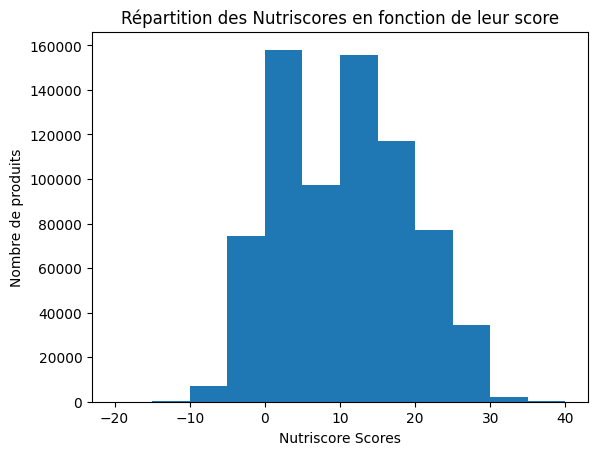

In [4]:
ranges = range(-20, 45, 5)

plt.hist(nutriscore_score_series, bins=ranges)

plt.xlabel("Nutriscore Scores")
plt.ylabel("Nombre de produits")
plt.title("Répartition des Nutriscores en fonction de leur score")

plt.show()

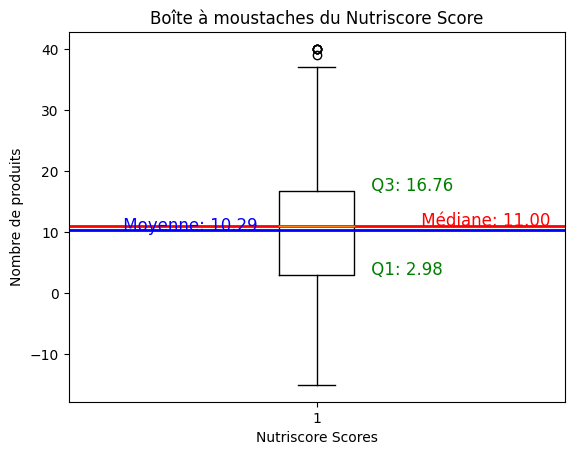

In [5]:
fig, ax = plt.subplots()
ax.boxplot(nutriscore_score_series)

# Ajout de labels et du titre
ax.set_xlabel("Nutriscore Scores")
ax.set_ylabel("Nombre de produits")
ax.set_title("Boîte à moustaches du Nutriscore Score")

ax.axhline(median, color='r', linestyle='-', linewidth=2)
ax.axhline(mean, color='b', linestyle='-', linewidth=2)

# Ajout des valeurs au graphique
ax.text(1.2, median, " Médiane: {:.2f}".format(median), color='r', fontsize=12)
ax.text(1.1, q1, " Q1: {:.2f}".format(q1), color='g', fontsize=12)
ax.text(1.1, q3, " Q3: {:.2f}".format(q3), color='g', fontsize=12)
ax.text(0.6, mean, " Moyenne: {:.2f}".format(mean), color='b', fontsize=12)




# Affichage de la boîte à moustaches
plt.show()

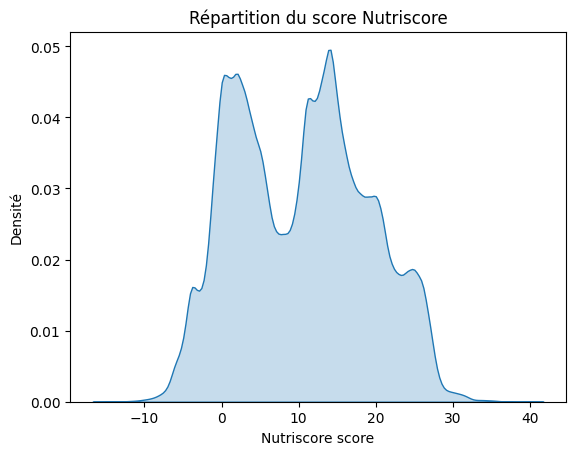

In [6]:
sns.kdeplot(nutriscore_score_series, fill=True)

plt.xlabel("Nutriscore score")
plt.ylabel("Densité")
plt.title("Répartition du score Nutriscore")

# Affichage du graphique de densité
plt.show()

Contrairement à ce que nous aurions pu penser, nous n'avons pas une concentration de la quantité de produits à la médiane, ni à la moyenne, mais plutôt deux concentrations qui sont quasi équivalentes sur des valeurs entre 0 et 10 puis entre 10 et 20.

### Analyse bivariée
#### Relation entre le nutriscore et la teneur en sucre

Dans le cadre de notre application, nous voulons pouvoir montrer les meilleurs ingrédients à nos clients lorsqu'ils vont entrer une recherche.\
Il est de notoriété publique de dire que les aliments qui contiennent beaucoup de sucre ne sont pas bons pour la santé, nous allons essayer de la vérifier en faisant une analyse bivariée.\
Normalement, la corrélation devrait apparaître, plus un produit contient du sucre, moins il est bon pour la santé, donc a un `nutriscore-score` élevé.

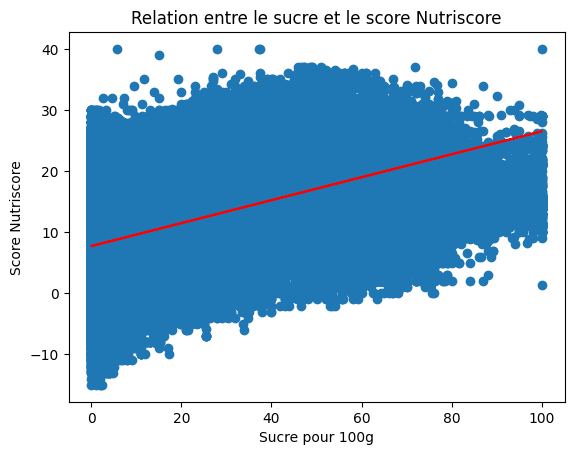

La covariance est de : 74.59, cela veut dire qu'elles sont liées. Si le nutriscore se dégrade/augmente, la teneur en sucres augmente, et inversement. N'ayant pas d'unité, celle-ci est peu significative. Nous regarderons donc la corrélation de Pearson.
La corrélation de pearson est de 0.44, une correlation existe entre le sucre et l'augmentation/dégradation du nutriscore.


In [7]:
plt.scatter(df['sugars_100g'], df['nutriscore_score'])

plt.xlabel("Sucre pour 100g")
plt.ylabel("Score Nutriscore")
plt.title("Relation entre le sucre et le score Nutriscore")

# Droite de régression
coefficients = np.polyfit(df['sugars_100g'], df['nutriscore_score'], 1)
slope = coefficients[0]
y_intercept = coefficients[1]
x = df['sugars_100g']
plt.plot(x, slope*x + y_intercept, color='red')

plt.show()

covariance = df['sugars_100g'].cov(df['nutriscore_score'])
corr_matrix = df[['sugars_100g', 'nutriscore_score']].corr()
pearson_coef = corr_matrix.iloc[0,1]
print(f"La covariance est de : {round(covariance,2)}, cela veut dire qu'elles sont liées. Si le nutriscore se dégrade/augmente, la teneur en sucres augmente, et inversement. N'ayant pas d'unité, celle-ci est peu significative. Nous regarderons donc la corrélation de Pearson.")
print(f"La corrélation de pearson est de {round(pearson_coef,2)}, une correlation existe entre le sucre et l'augmentation/dégradation du nutriscore.")

#### Relation entre le nutriscore et la teneur en kcal
Idem qu'au-dessus, il serait plutôt logique, bien peut-être qu'un peu moins, qu'un aliment contenant beaucoup de calories ait un `nutriscore-score` élevé.

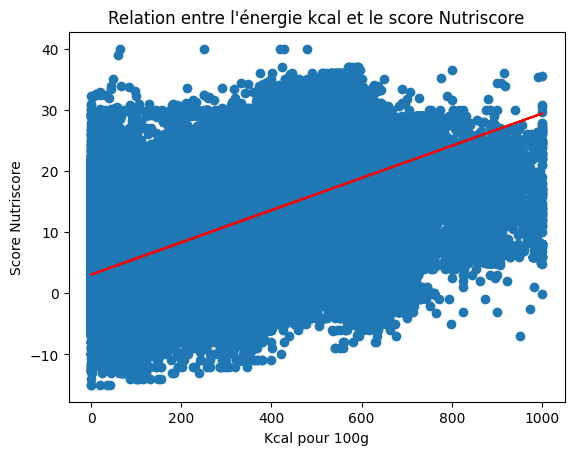

La covariance est de : 945.16, cela veut dire qu'elles sont liées. Mais idem que précédemment, pas d'unité, alors il est difficile de pouvoir juger.
La corrélation de pearson est de 0.58, ce qui est encore plus que pour la relation sucre/nutriscore. Plus un produit est calorique, plus son nutriscore est haut.


In [8]:
plt.scatter(df['energy-kcal_100g'], df['nutriscore_score'])

plt.xlabel("Kcal pour 100g")
plt.ylabel("Score Nutriscore")
plt.title("Relation entre l'énergie kcal et le score Nutriscore")

# Droite de régression
coefficients = np.polyfit(df['energy-kcal_100g'], df['nutriscore_score'], 1)
slope = coefficients[0]
y_intercept = coefficients[1]
x = df["energy-kcal_100g"]
plt.plot(x, slope*x + y_intercept, color='red')

plt.show()
covariance = df['energy-kcal_100g'].cov(df['nutriscore_score'])
corr_matrix = df[['energy-kcal_100g', 'nutriscore_score']].corr()
pearson_coef = corr_matrix.iloc[0,1]
print(f"La covariance est de : {round(covariance,2)}, cela veut dire qu'elles sont liées. Mais idem que précédemment, pas d'unité, alors il est difficile de pouvoir juger.")
print(f"La corrélation de pearson est de {round(pearson_coef,2)}, ce qui est encore plus que pour la relation sucre/nutriscore. Plus un produit est calorique, plus son nutriscore est haut.")

#### Relation entre les fibres et la teneur en kcal

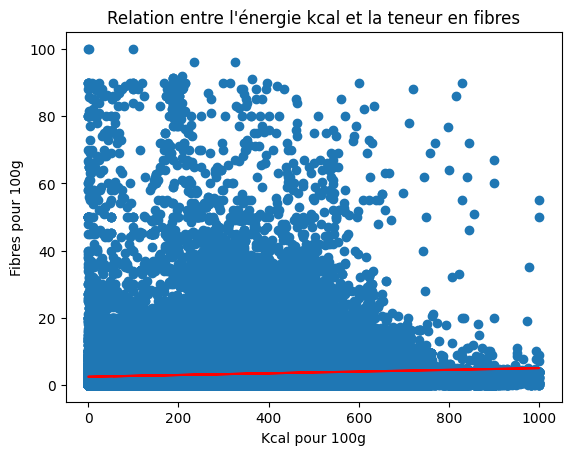

La covariance est de : 91.82, un chiffre bien plus petit que le précédent, mais qui peut encore une fois induire en erreur.
La corrélation de pearson est de 0.1440210119442618 montre ici qu'il y a une faible corrélation etre le nombre de kcal d'un produit et sa teneur en fibres.


In [9]:
plt.scatter(df['energy-kcal_100g'], df['fiber_100g'])

plt.xlabel("Kcal pour 100g")
plt.ylabel("Fibres pour 100g")
plt.title("Relation entre l'énergie kcal et la teneur en fibres")

# Droite de régression
coefficients = np.polyfit(df['energy-kcal_100g'], df['fiber_100g'], 1)
slope = coefficients[0]
y_intercept = coefficients[1]
x = df["energy-kcal_100g"]
plt.plot(x, slope*x + y_intercept, color='red')

plt.show()
covariance = df['energy-kcal_100g'].cov(df['fiber_100g'])
corr_matrix = df[['energy-kcal_100g', 'fiber_100g']].corr()
pearson_coef = corr_matrix.iloc[0,1]

print(f"La covariance est de : {round(covariance,2)}, un chiffre bien plus petit que le précédent, mais qui peut encore une fois induire en erreur.")
print(f"La corrélation de pearson est de {pearson_coef} montre ici qu'il y a une faible corrélation etre le nombre de kcal d'un produit et sa teneur en fibres.")

### Tableau de contingence entre Catégories et Nutriscore

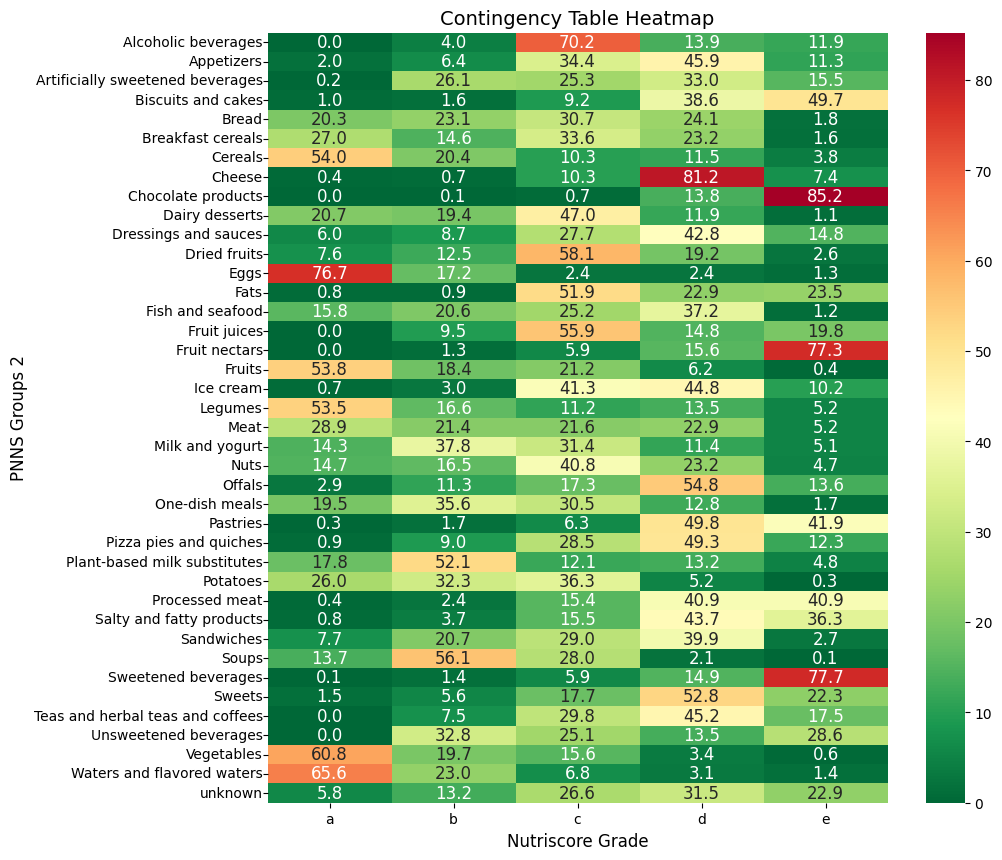

In [15]:
# You can use the crosstab() method to create the contingency table
contingency_table = pd.crosstab(df['pnns_groups_2'], df['nutriscore_grade'], normalize='index') *100

# Display the contingency table
contingency_table

fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(contingency_table, cmap="RdYlGn_r", annot=True, fmt=".1f", annot_kws={'fontsize': 12}, ax=ax)
ax.set_xlabel('Nutriscore Grade', fontsize=12)
ax.set_ylabel('PNNS Groups 2', fontsize=12)
ax.set_title('Contingency Table Heatmap', fontsize=14)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=10)
ax.tick_params(axis='y', which='major', pad=0)
plt.show()


Ce tableau de contingence nous fait apparaître une belle distribution dans la catégorie `Meat`, les viandes. \
Nous allons effectuer une analyse plus fine sur cette catégorie pour regarder les différents indicateurs en fonction de la lettre du nutriscore.

### Analyse fine d'un groupe : Meats - Viandes

In [28]:
df_meat = df[df['pnns_groups_2']=='Meat']

meat_grouped_by_grade = df_meat.groupby('nutriscore_grade')[['nutriscore_score', 'fat_100g', 'saturated-fat_100g', 'fiber_100g', 'sugars_100g', 'energy-kcal_100g']].mean()
meat_grouped_by_grade_style = meat_grouped_by_grade.style.background_gradient(cmap='RdYlGn_r', axis=0).format("{:.2f}")

display(meat_grouped_by_grade_style)

print("Nous voyons que les valeurs correspondent à l'idée reçue. Dans la catégorie des viandes, les fibres sont très peu présentes et n'ont que très peu d'incidence.\nNéanmoins, alors qu'on aurait pu penser le contraire ou que cela n'intervienne pas, le sucre est présent dans les viandes.\nCela peut être signe de la présence de plats préparés dans nos ingrédients.")

,nutriscore_score,fat_100g,saturated-fat_100g,fiber_100g,sugars_100g,energy-kcal_100g
nutriscore_grade,,,,,,
a,-3.12,3.20,0.97,0.65,0.32,116.20
b,0.91,6.61,1.94,0.66,0.57,170.62
c,4.05,9.04,2.88,0.68,0.77,172.93
d,13.34,13.61,5.05,0.70,1.21,240.15
e,21.66,28.50,12.26,0.66,2.19,357.11


Nous voyons que les valeurs correspondent à l'idée reçue. Dans la catégorie des viandes, les fibres sont très peu présentes et n'ont que très peu d'incidence.
Néanmoins, alors qu'on aurait pu penser le contraire ou que cela n'intervienne pas, le sucre est présent dans les viandes.
Cela peut être signe de la présence de plats préparés dans nos ingrédients.


In [12]:
# Faire une étude fine sur une catégorie
# Catégories et nutriscore_grade => Tableau de contingence, A => avec une catégorie
# Anova = analyse multivariée entre variable quantitative et qualitative
# ACP

### ANOVA
Nous utiliserons l'ANOVA pour tester si les moyennes de plusieurs groupes (ici les `nutriscore_grade` sont bien différentes pour les teneurs en `fat_100g` et `saturated-fat_100g'.

In [13]:

from scipy.stats import f_oneway, bartlett, shapiro

df_anova = df[['fat_100g', 'saturated-fat_100g', 'nutriscore_grade']]

grouped = df_anova.groupby('nutriscore_grade')

means = grouped.mean()
stds = grouped.std()

for col in ['fat_100g', 'saturated-fat_100g']:
    stat, p = shapiro(df[col])
    print('stat=%.3f, p=%.3f' % (stat, p))
    if p > 0.05:
        print('La distribution semble normale')
    else:
        print('La distribution ne semble pas normale')

stat=0.773, p=0.000
La distribution ne semble pas normale
stat=0.689, p=0.000
La distribution ne semble pas normale


/home/degregor69/.local/lib/python3.10/site-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


## Comment améliorer les données pour Nutriwise.io
### Calcul d'un eco-score
L'éco-score n'est que très peu présent et difficilement calculable avec ce dataset.\
Il s'agit de quelque chose de très difficile à calculer puisque cela a de multiples facteurs : 

* Le lieu de fabrication du produit
* Le lieu de fabrication des ingrédients du produit lorsqu'il s'agit d'un plat préparé
* La quantité de ressources utilisée pour fabriquer le produit, qui peut aussi dépendre du lieu de fabrication
* Les ingrédients, leur origine et leur propre fabrication
* La distance entre le lieu de fabrication/cueille/élevage et le lieu de ventes
* Le moyen de transport utilisé

Faire tenir cette information dans un score est déjà compliqué, mais obtenir toutes ces données en est encore une autre. Avec le jeu d'OpenFoodFacts, ce n'est pas possible pour l'instant.\
Il faudrait une très grande transparence des producteurs et industriels pour arriver à quelque chose de cohérent.

### Une distinction produits bruts et produits transformés
Dans le cadre de nutriwise.io, il serait plausible d'être capable de donner à la fois des alternatives brutes et transformées.\
Dans notre cas, un besoin en courgettes pourrait se matérialiser par une poêlée de courgettes cuisinée surgelée, alors que le meilleur ingrédient serait une courgette brute.
OpenFoodFacts se base sur des produits ayant un code-barres, néanmoins, il serait peut-être judicieux de réussir à entrer en base de données les produits bruts. Leur nombre ne doit pas être si élevé et les informations nutritionnelle